In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/content/customer_churn_.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.shape

(7043, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum().sum()

np.int64(11)

In [18]:
for col in df.columns:
  if df[col].dtype=="object":
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].mode()[0])


In [19]:
df.isnull().sum().sum()

np.int64(0)

In [20]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.isin([" " , '/','?']).sum().sum()

np.int64(0)

In [37]:
male_customers = df[df['gender'] == 'Male'].shape[0]
print("Total Male Customers:", male_customers)


Total Male Customers: 3555


In [40]:
Dsl_Customers=df[df['InternetService']=='DSL'].shape[0]
print("Total DSL Customers:", Dsl_Customers)

Total DSL Customers: 2421


In [45]:
new_customers=df[
    (df['gender']=='Female')&
    (df['SeniorCitizen']==1)&
    (df['PaymentMethod']=='Mailed check')
]
new_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No


In [46]:
new_customer = df[
    (df['tenure'] < 10) |
    (df['TotalCharges'] < 500)
]

new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


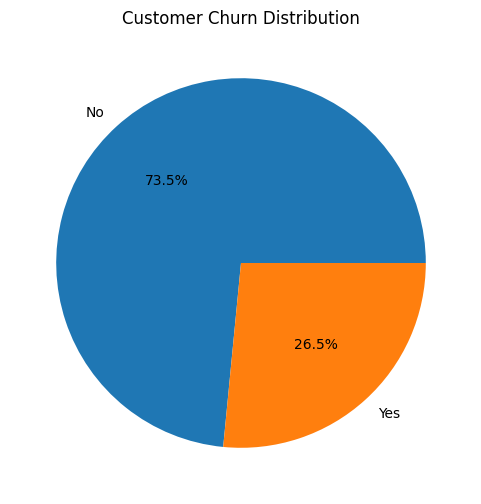

In [49]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title("Customer Churn Distribution")
plt.show()


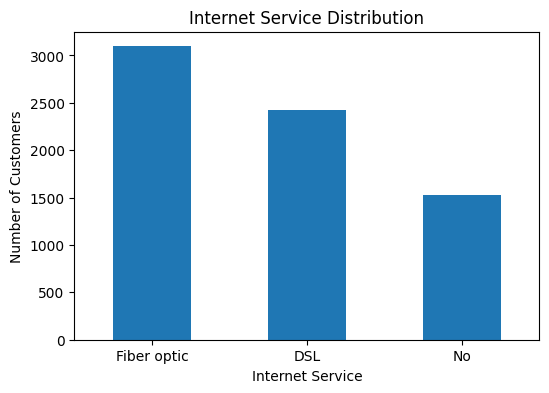

In [57]:
internet_counts = df['InternetService'].value_counts()

plt.figure(figsize=(6,4))
internet_counts.plot(kind='bar')
plt.title("Internet Service Distribution")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [59]:
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [60]:
x=df['tenure']
y=df['Churn']

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
se=StandardScaler()
x_train=se.fit_transform(x_train.values.reshape(-1, 1))
x_test=se.transform(x_test.values.reshape(-1, 1))

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [75]:
model=Sequential([
    Dense(12,activation='relu',input_dim=1),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

In [81]:
history=model.fit(
    x_train,y_train,
    epochs=150,
    validation_data=(x_test, y_test)
)

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7581 - loss: 0.5061 - val_accuracy: 0.7544 - val_loss: 0.4977
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7473 - loss: 0.5224 - val_accuracy: 0.7544 - val_loss: 0.4976
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7661 - loss: 0.4942 - val_accuracy: 0.7544 - val_loss: 0.4982
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7531 - loss: 0.5020 - val_accuracy: 0.7544 - val_loss: 0.4978
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7547 - loss: 0.5063 - val_accuracy: 0.7544 - val_loss: 0.4979
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7463 - loss: 0.5178 - val_accuracy: 0.7544 - val_loss: 0.4976
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7544 - loss: 0.5084 - val_accuracy: 0.7544 - val_loss: 0.4974
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7489 - loss: 0.5148 - val_accu

In [89]:
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[929 107]
 [239 134]]


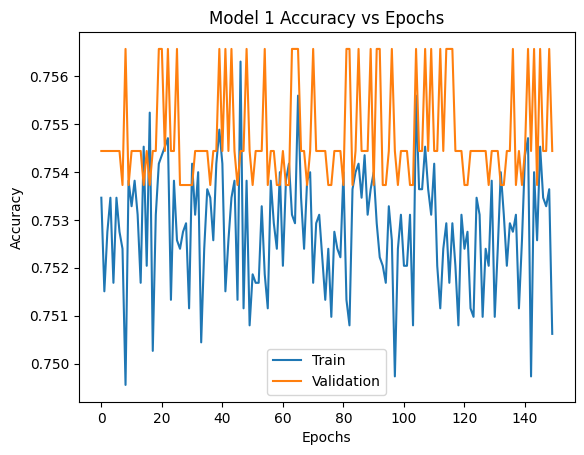

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model 1 Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


In [83]:
from tensorflow.keras.layers import Dropout

In [85]:
model1=Sequential([
     Dense(12,activation='relu',input_dim=1),
     Dropout(0.3),
     Dense(8,activation='relu'),
     Dropout(0.2),
     Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

In [87]:
history1=model1.fit(
    x_train,y_train,
    epochs=150,
    validation_data=(x_test, y_test)
)

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6326 - loss: 0.6673 - val_accuracy: 0.7353 - val_loss: 0.5166
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7338 - loss: 0.5360 - val_accuracy: 0.7353 - val_loss: 0.5022
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7227 - loss: 0.5428 - val_accuracy: 0.7353 - val_loss: 0.5002
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7379 - loss: 0.5198 - val_accuracy: 0.7353 - val_loss: 0.5011
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7368 - loss: 0.5245 - val_accuracy: 0.7353 - val_loss: 0.5006
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7412 - loss: 0.5225 - val_accuracy: 0.7353 - val_loss: 0.4998
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7372 - loss: 0.5199 - val_accuracy: 0.7353 - val_loss: 0.5004
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7473 - loss: 0.5256 - val_acc

In [90]:
y_pred2 = (model1.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred2))

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
[[1036    0]
 [ 373    0]]


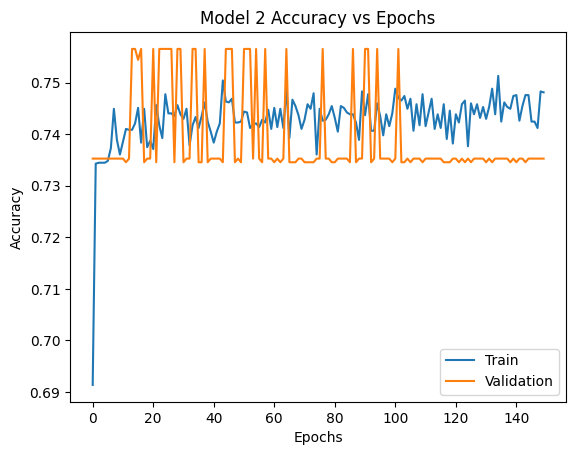

In [92]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Model 2 Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


In [94]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
Y = df['Churn']


In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [97]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [98]:
model2=Sequential([
    Dense(12,activation='relu',input_dim=3),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

In [100]:
history2=model2.fit(
    x_train,y_train,
    epochs=150,
    validation_data=(x_test, y_test)
)

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6703 - loss: 0.5944 - val_accuracy: 0.7353 - val_loss: 0.4803
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7354 - loss: 0.4832 - val_accuracy: 0.7353 - val_loss: 0.4545
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7358 - loss: 0.4732 - val_accuracy: 0.7842 - val_loss: 0.4469
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 0.4683 - val_accuracy: 0.7956 - val_loss: 0.4416
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7826 - loss: 0.4651 - val_accuracy: 0.7956 - val_loss: 0.4366
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.4655 - val_accuracy: 0.7864 - val_loss: 0.4345
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7805 - loss: 0.4584 - val_accuracy: 0.7991 - val_loss: 0.4329
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.4727 - val_accu

In [102]:
y_pred3 = (model2.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred3))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[980  56]
 [228 145]]


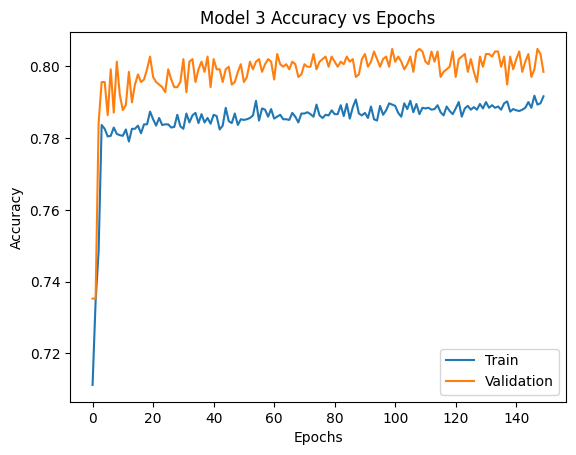

In [103]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model 3 Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()
